# Model validation altimetry

Note: this notebook requires the model output data

In [1]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
altlist = h.get_altimetry_obs(quality=None)

In [4]:
mr = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: Surface Elevation [m]

In [5]:
cmps = []
match_t = "2023" # You can choose a specific time period here
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time=match_t), mod=mr) 
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3a...
Processing 3b...
Processing 6a...
Processing c2...
Processing j2...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing j3...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing sa...


In [6]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,82,-0.0,0.0936,0.0936,0.0747,0.9009,0.1886,0.7168
3b,38,0.0,0.0652,0.0652,0.0535,0.9522,0.1459,0.8929
6a,81,0.0,0.1147,0.1147,0.0726,0.8768,0.3218,0.4948
c2,50,0.0,0.0933,0.0933,0.0759,0.9395,0.2114,0.7636
sa,40,-0.0,0.0681,0.0681,0.0538,0.8555,0.1588,0.5619


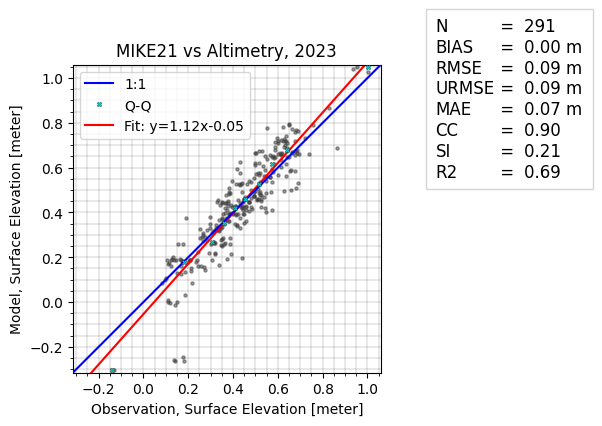

In [13]:
cc.plot.scatter(show_density=False,skill_table=True, figsize=(5,4));
plt.title("MIKE21 vs Altimetry, "+match_t)
plt.savefig("../figures/altimetry_comparison.png", bbox_inches="tight")

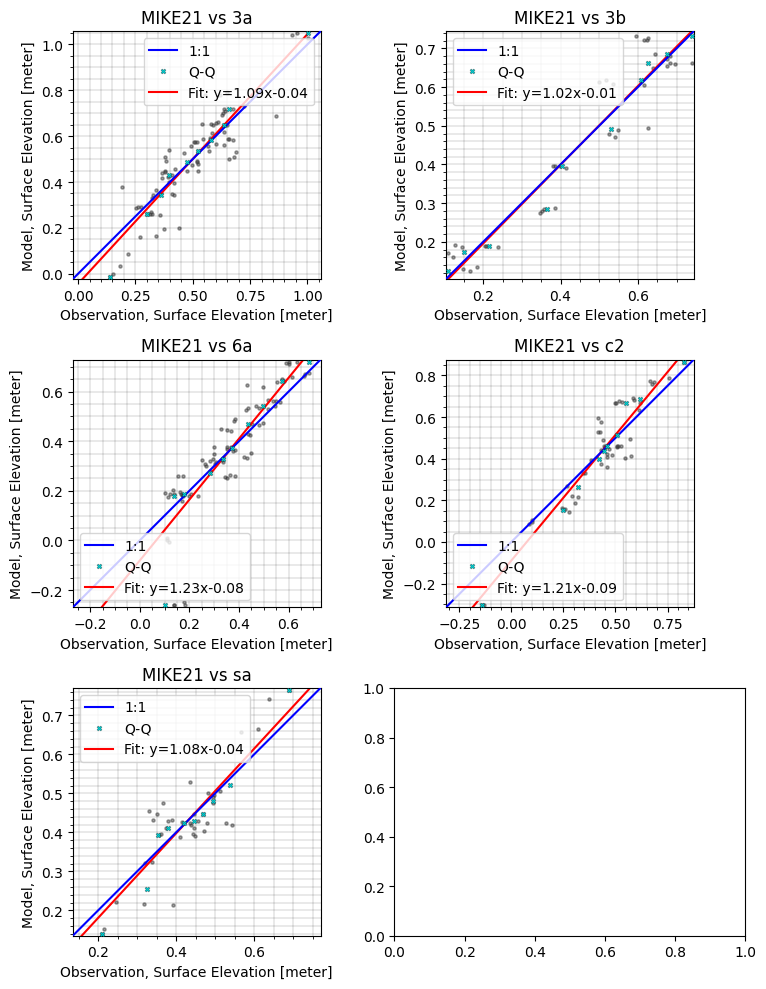

In [10]:
fig, axs = plt.subplots(-(-len(cc)//2), 2, figsize=(8,len(cc)*2))
axs = axs.flatten()
for i in range(len(cc)):
    cc[i].sel().plot.scatter(ax=axs[i], show_density=False)
plt.tight_layout()
plt.show()